In [587]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [588]:
sourcedata = '../SourceData/DataScienceSalary_Scrubbed.csv'
df = pd.read_csv(sourcedata).drop(columns=['Unnamed: 0'])
print(df.head(10))

   YEAR   EXPERIENCE EMPLOYMENT                      TITLE LOCATION  \
0  2023  Entry Level  Full time          Applied Scientist       US   
1  2023  Entry Level  Full time          Applied Scientist       US   
2  2023  Entry Level  Full time       Data Quality Analyst       NG   
3  2023  Entry Level  Full time    Compliance Data Analyst       NG   
4  2023  Entry Level  Full time          Applied Scientist       US   
5  2023  Entry Level  Full time          Applied Scientist       US   
6  2023  Entry Level  Full time  Machine Learning Engineer       US   
7  2023  Entry Level  Full time  Machine Learning Engineer       US   
8  2023  Entry Level  Full time         Research Scientist       US   
9  2023  Entry Level  Full time              Data Engineer       US   

  COMPANYSIZE  SALARY  
0       Large  213660  
1       Large  130760  
2       Large  100000  
3       Large   30000  
4       Large  204620  
5       Large  110680  
6      Medium  163196  
7      Medium  145885  
8 

In [589]:
#df=df.sample(n=100)
#df_.groupby('EXPERIENCE').count()

In [590]:
#df=df(df[['EXPERIENCE','SALARY']].filter(df['EXPERIENCE']!='Senior'))
'''df = df[(df['EXPERIENCE']!='Senior')]'''
df =df[['EXPERIENCE','SALARY']]
df.groupby('EXPERIENCE').count()

,SALARY
EXPERIENCE,
Entry Level,267
Experienced,95
Mid Level,631
Senior,1417


In [591]:
df['EXPERIENCE']=df['EXPERIENCE'].replace({"Entry Level":1,"Experienced":2,"Mid Level":3,"Senior":4})
#df=df.drop(columns=['EXPERIENCE'])
df


/tmp/ipykernel_388628/12153378.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EXPERIENCE']=df['EXPERIENCE'].replace({"Entry Level":1,"Experienced":2,"Mid Level":3,"Senior":4})


,EXPERIENCE,SALARY
0,1,213660
1,1,130760
2,1,100000
3,1,30000
4,1,204620
...,...,...
2405,4,148261
2406,4,91237
2407,4,190200
2408,4,45618


In [592]:
'''#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_train,reg.predict(X_train))
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)'''

'#Check Model Accuracy\nfrom sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score\nimport numpy as np\nscore_r2 =r2_score(y_train,reg.predict(X_train))\nscore_m = mean_absolute_error(y_test,y_pred)\nscore_meansquare=mean_squared_error(y_test,y_pred)\nscore_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))\nprint("R2",score_r2)\nprint("Mean Abs",score_m)\nprint("Mean Square",score_meansquare)\nprint("Root Mean Square",score_rootmeansquared)'

In [593]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [594]:
'''X=X.reshape(1,-1)
X.shape'''

'X=X.reshape(1,-1)\nX.shape'

In [595]:
#y.shape

In [596]:
'''from sklearn.preprocessing import StandardScaler,normalize
y_=np.array(y)
y =normalize([y_])
y=y.reshape(1,-1)
y.shape'''

'from sklearn.preprocessing import StandardScaler,normalize\ny_=np.array(y)\ny =normalize([y_])\ny=y.reshape(1,-1)\ny.shape'

In [597]:
df.groupby(['EXPERIENCE']).count()

,SALARY
EXPERIENCE,
1,267
2,95
3,631
4,1417


In [598]:
#Encoding Categorical Data - Independent data
#Encoding Independent variables --> OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
#encone = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

encone = OneHotEncoder(handle_unknown='ignore')
encone.fit(X)
'''ordinal_mapping =[
    {
        "col":"EXPERIENCE","mapping":{"Entry Level":1,"Experienced	":2,"Mid Level":3,"Senior":4}
    }
]
X_transform =ColumnTransformer(
    [
        (
            'ordinal',OrdinalEncoder(ColumnTransformer=['EXPERIENCE'],mapping=ordinal_mapping),['EXPERIENCE']
        )
    ],remainder='passthrough'
)'''
#X_transform=enc.fit_transform(X).toarray()
#X=enc.transform(X).toarray()
#X_transform=np.array(X_transform)
#y=np.array(y)
'''
encone.categories_
X_transform=encone.transform(X).toarray()
print(X_transform)'''

'\nencone.categories_\nX_transform=encone.transform(X).toarray()\nprint(X_transform)'

In [599]:
#X_transform.reshape(1,-1)

In [600]:
#encone.inverse_transform(X_transform)

In [601]:
'''from sklearn.preprocessing import StandardScaler,Normalizer
transformer = StandardScaler().fit(X)
X=transformer.transform(X)
'''

'from sklearn.preprocessing import StandardScaler,Normalizer\ntransformer = StandardScaler().fit(X)\nX=transformer.transform(X)\n'

In [602]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [603]:
from sklearn.linear_model  import LinearRegression
#reg = RandomForestRegressor(max_depth=2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [604]:
y_pred = reg.predict(X_test)
y_pred

array([148939.17722446, 148939.17722446, 125051.98287021,  77277.5941617 ,
       148939.17722446, 148939.17722446, 125051.98287021, 148939.17722446,
       148939.17722446, 101164.78851595, 125051.98287021, 148939.17722446,
       148939.17722446, 125051.98287021,  77277.5941617 ,  77277.5941617 ,
       148939.17722446, 148939.17722446, 148939.17722446, 125051.98287021,
       148939.17722446, 101164.78851595, 148939.17722446, 125051.98287021,
        77277.5941617 , 148939.17722446, 125051.98287021, 148939.17722446,
       125051.98287021, 148939.17722446, 125051.98287021,  77277.5941617 ,
        77277.5941617 , 148939.17722446, 125051.98287021, 125051.98287021,
       125051.98287021, 148939.17722446,  77277.5941617 , 148939.17722446,
       125051.98287021, 125051.98287021, 125051.98287021, 125051.98287021,
       148939.17722446, 125051.98287021, 125051.98287021,  77277.5941617 ,
        77277.5941617 , 148939.17722446, 148939.17722446, 148939.17722446,
       148939.17722446, 1

In [605]:
'''y_pred.shape
(y_test.reshape(-1,1)).shape'''

'y_pred.shape\n(y_test.reshape(-1,1)).shape'

In [606]:
reg.score(X_train,y_train)

0.11639448546196496

In [607]:
#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_test,y_pred)
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)

R2 0.16187276172224163
Mean Abs 48709.580377347724
Mean Square 3894298384.5954266
Root Mean Square 62404.31383001841


In [608]:
X_train_=X_train.reshape(1,-1)
X_train_.shape

(1, 1928)

In [609]:
y_train_=y_train.reshape(1,-1)
y_train_.shape

(1, 1928)

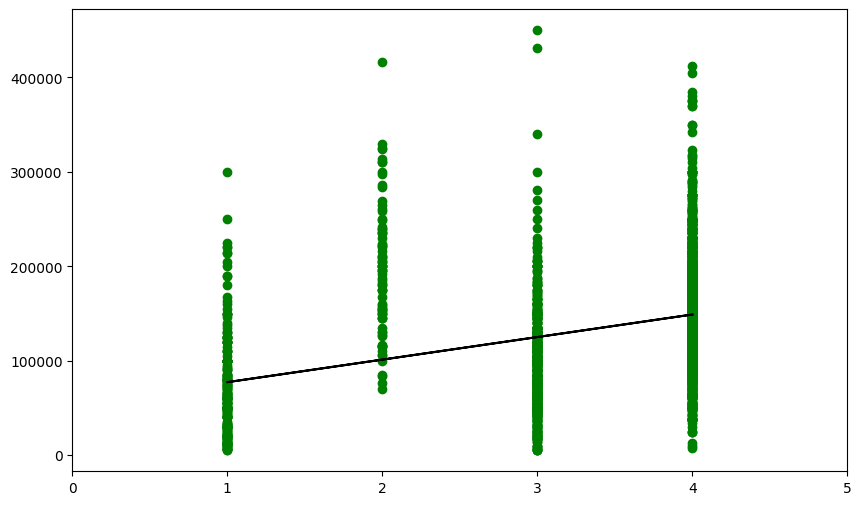

In [610]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train,color='g')
plt.plot(X_train,reg.predict(X_train),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
plt.xlim(0,5)
plt.show()